# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Carregue os dados da tarefa anterior

In [64]:
from pandas_datareader import data as web
import plotly.express as px 
from plotly import graph_objects
import yfinance as yf 
import pandas as pd
import numpy as np

In [65]:
ativos = ['AAPL', 'MSFT', 'TSLA']
dt_ini = '2022-01-01'
yf_data = yf.download(ativos, start=dt_ini, interval='1d')
yf_data

[*********************100%%**********************]  3 of 3 completed


Price        Adj Close                               Close              \
Ticker            AAPL        MSFT        TSLA        AAPL        MSFT   
Date                                                                     
2022-01-03  179.481110  327.530121  399.926666  182.009995  334.750000   
2022-01-04  177.203201  321.913940  383.196655  179.699997  329.010010   
2022-01-05  172.489624  309.556305  362.706665  174.919998  316.380005   
2022-01-06  169.610214  307.110260  354.899994  172.000000  313.880005   
2022-01-07  169.777832  307.266785  342.320007  172.169998  314.040009   
...                ...         ...         ...         ...         ...   
2024-07-08  227.820007  466.239990  252.940002  227.820007  466.239990   
2024-07-09  228.679993  459.540009  262.329987  228.679993  459.540009   
2024-07-10  232.979996  466.250000  263.260010  232.979996  466.250000   
2024-07-11  227.570007  454.700012  241.029999  227.570007  454.700012   
2024-07-12  230.539993  453.549988  248.229996  230.539993  453.549988   

Price                         High                                 Low  \
Ticker            TSLA        AAPL        MSFT        TSLA        AAPL   
Date                                                                     
2022-01-03  399.926666  182.880005  338.000000  400.356659  177.710007   
2022-01-04  383.196655  182.940002  335.200012  402.666656  179.119995   
2022-01-05  362.706665  180.169998  326.070007  390.113342  174.639999   
2022-01-06  354.899994  175.300003  318.700012  362.666656  171.639999   
2022-01-07  342.320007  174.139999  316.500000  360.309998  171.029999   
...                ...         ...         ...         ...         ...   
2024-07-08  252.940002  227.850006  467.700012  259.440002  223.250000   
2024-07-09  262.329987  229.399994  467.329987  265.609985  226.369995   
2024-07-10  263.260010  233.080002  466.459991  267.589996  229.250000   
2024-07-11  241.029999  232.389999  464.779999  271.000000  225.770004   
2024-07-12  248.229996  232.639999  456.334991  251.839005  228.679993   

Price                                     Open                          \
Ticker            MSFT        TSLA        AAPL        MSFT        TSLA   
Date                                                                     
2022-01-03  329.779999  378.679993  177.830002  335.350006  382.583344   
2022-01-04  326.119995  374.350006  182.630005  334.829987  396.516663   
2022-01-05  315.980011  360.336670  179.610001  325.859985  382.216675   
2022-01-06  311.489990  340.166656  172.699997  313.149994  359.000000   
2022-01-07  310.089996  336.666656  172.889999  314.149994  360.123322   
...                ...         ...         ...         ...         ...   
2024-07-08  464.459991  244.570007  227.089996  466.549988  247.710007   
2024-07-09  458.000000  250.300003  227.929993  467.000000  251.000000   
2024-07-10  458.859985  257.859985  229.300003  461.220001  262.799988   
2024-07-11  451.549988  239.649994  231.389999  462.980011  263.299988   
2024-07-12  450.644989  233.091202  229.000000  454.325012  235.729996   

Price          Volume                       
Ticker           AAPL      MSFT       TSLA  
Date                                        
2022-01-03  104487900  28865100  103931400  
2022-01-04   99310400  32674300  100248300  
2022-01-05   94537600  40054300   80119800  
2022-01-06   96904000  39646100   90336600  
2022-01-07   86709100  32720000   84164700  
...               ...       ...        ...  
2024-07-08   59085900  12962300  157219600  
2024-07-09   48076100  17207200  160210900  
2024-07-10   62627700  18196100  128519400  
2024-07-11   64710600  23111200  221707300  
2024-07-12   52696428  16177539  155178091  

[634 rows x 18 columns]

#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

In [67]:
fechamento_vertical = yf_data['Adj Close'].stack().reset_index()
fechamento_vertical.columns = ['data', 'ativo', 'valor_fechamento']

In [68]:
# e agora na base do yahoo finance com tamanho = 360
rolling_mean_90 = fechamento_vertical['valor_fechamento'].rolling(90).mean()
fechamento_vertical['rolling_mean_90'] = rolling_mean_90
fechamento_vertical

,data,ativo,valor_fechamento,rolling_mean_90
0,2022-01-03,AAPL,179.481110,NaN
1,2022-01-03,MSFT,327.530121,NaN
2,2022-01-03,TSLA,399.926666,NaN
3,2022-01-04,AAPL,177.203201,NaN
4,2022-01-04,MSFT,321.913940,NaN
...,...,...,...,...
1897,2024-07-11,MSFT,454.700012,282.920889
1898,2024-07-11,TSLA,241.029999,283.635112
1899,2024-07-12,AAPL,230.539993,284.082334
1900,2024-07-12,MSFT,453.549988,284.353222


In [69]:
rolling_std_90 = fechamento_vertical['valor_fechamento'].rolling(90).std()
fechamento_vertical['rolling_std_90'] = rolling_std_90
fechamento_vertical

,data,ativo,valor_fechamento,rolling_mean_90,rolling_std_90
0,2022-01-03,AAPL,179.481110,NaN,NaN
1,2022-01-03,MSFT,327.530121,NaN,NaN
2,2022-01-03,TSLA,399.926666,NaN,NaN
3,2022-01-04,AAPL,177.203201,NaN,NaN
4,2022-01-04,MSFT,321.913940,NaN,NaN
...,...,...,...,...,...
1897,2024-07-11,MSFT,454.700012,282.920889,115.554987
1898,2024-07-11,TSLA,241.029999,283.635112,115.089105
1899,2024-07-12,AAPL,230.539993,284.082334,114.800142
1900,2024-07-12,MSFT,453.549988,284.353222,115.174499


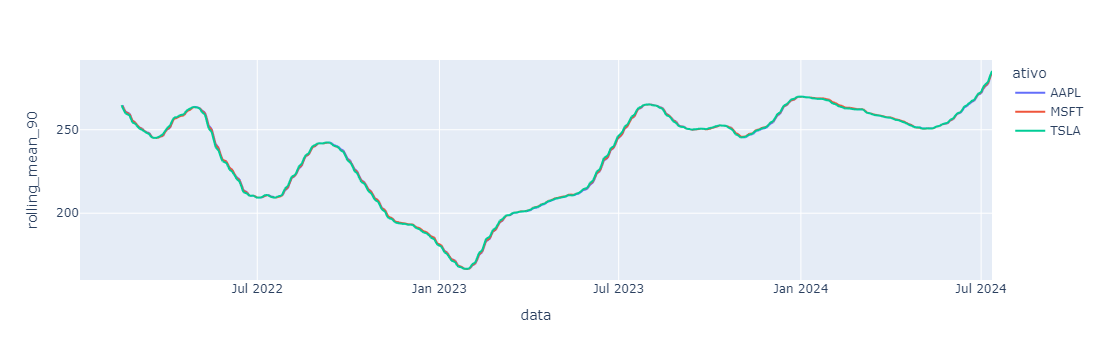

In [73]:
fig = px.line(fechamento_vertical, x="data", y="rolling_mean_90", color='ativo')
fig.show()

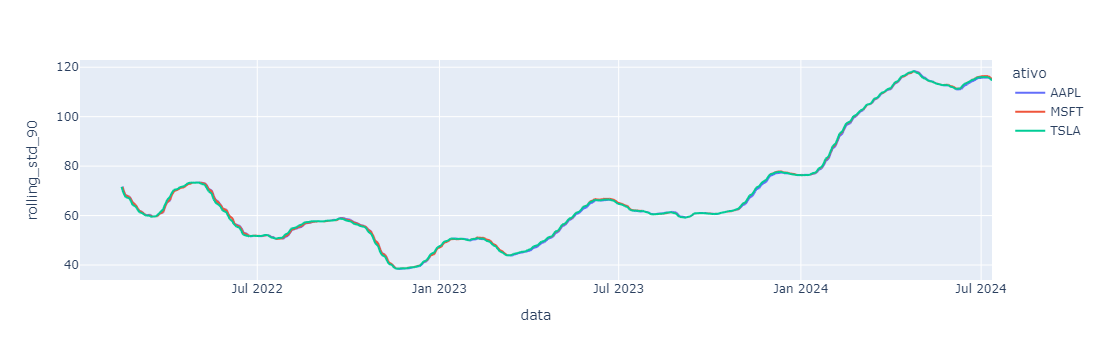

In [75]:
fig = px.line(fechamento_vertical, x="data", y="rolling_std_90", color='ativo')
fig.show()

##### Os gráfico de média móvel dos últimos 90 dias não faz um bom trabalha em elucidar a volatilidade durante todo o período, justamente pelo fator de suavização. Já o gráfico de desvio padrão faz um bom trabalho em elucidar a volatilidade na janela de 90 dias, ainda que de maneira suave.

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

In [92]:
indicadores = ['Close', 'High', 'Low', 'Open']
ativo = ['AAPL']*len(indicadores)

In [94]:
colunas = list(zip(indicadores, ativo))

In [96]:
aapl = yf_data.loc['05/12/2024':, colunas]
aapl.columns = indicadores

In [100]:
graph = {
    'x': aapl.index,
    'open': aapl.Open,
    'close': aapl.Close,
    'high': aapl.High,
    'low': aapl.Low,
    'type': 'candlestick',
    'name': 'AAPL',
    'showlegend': True
}

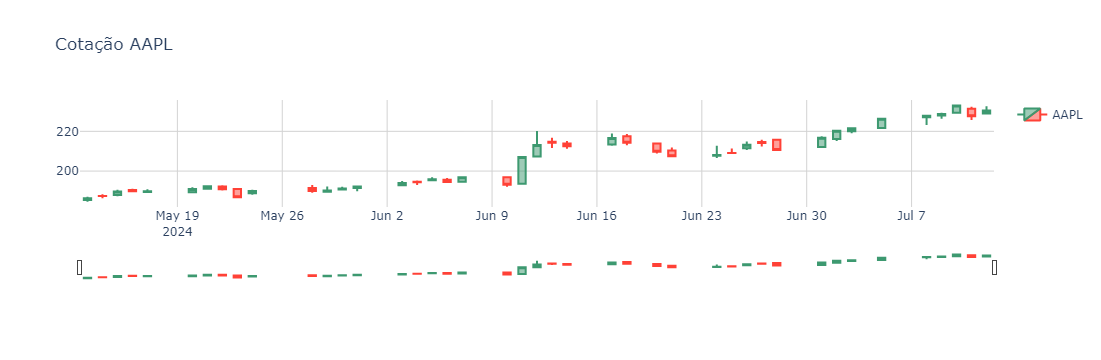

In [122]:
from plotly import graph_objects
from plotly.graph_objs import Layout

layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

grafico = graph_objects.Figure(
    data = [graph],
    layout_title="Cotação AAPL",
    layout=layout
)
grafico.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
grafico.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

grafico